<a href="https://colab.research.google.com/github/vatiza/Machine_Learning/blob/main/lab3_preprocessing_diabetes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab3
Preprocessing diabetes dataset
[Diabetes Dataset](https://drive.google.com/file/d/11Nyj_bDqvz41m3FJjolTHlkImj2D6AWi/view?usp=sharing)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')

print("Number of Samples: %d"% data.shape[0])
print("Number of Features: %d" %data.shape[1])
data.head()

Number of Samples: 768
Number of Features: 9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# tmp dataset
tmpData=data
# check Missing value
print("Number of Missing Values:")
tmpData.isnull().sum()

Number of Missing Values:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# 2 column drop (Pregnancies, Outcome)
X=tmpData.drop(['Outcome'],axis=1)
y=tmpData["Outcome"]
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
# separate data
numOfdup=df.duplicated().sum()
print("Number of duplicate rows:",numOfdup)

Number of duplicate rows: 0


<Axes: >

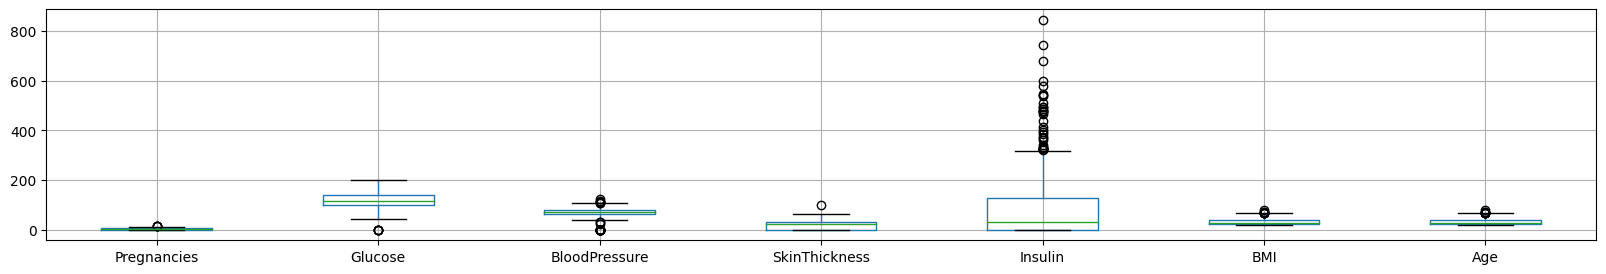

In [ ]:
# Outliers
df['BMI'] = pd.to_numeric(df['Age'])
df.boxplot(figsize=(20,3))

# z score normalization
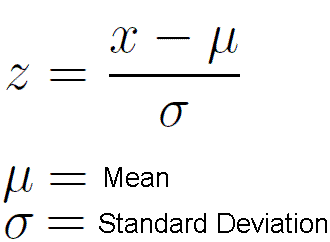

In [ ]:
Z = (df-df.mean())/df.std()
Z[0:767]
Z.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,0.639530,0.847771,0.149543,0.906679,-0.692439,1.425067,1.425067
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.190548,-0.190548
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-0.105515,-0.105515
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-1.040871,-1.040871
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,-0.020483,-0.020483


In [ ]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==7) & ((Z <= 3).sum(axis=1)==7),:]
print('Number of rows after discarding outliers = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 768
Number of rows after discarding outliers = 701


<ipython-input-84-1e1ddadc88b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z2['BMI'] = pd.to_numeric(Z2['Age'])


<Axes: >

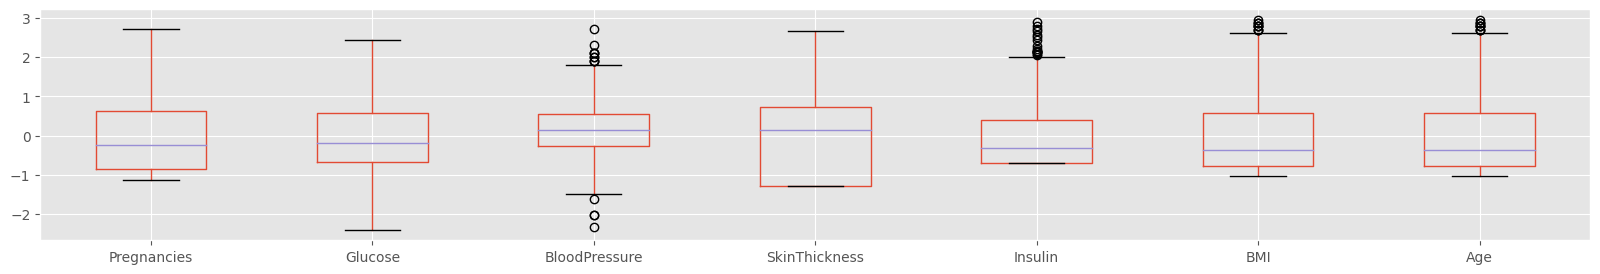

In [ ]:
Z2['BMI'] = pd.to_numeric(Z2['Age'])
Z2.boxplot(figsize=(20,3))

<ipython-input-122-c1ad4fa594bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

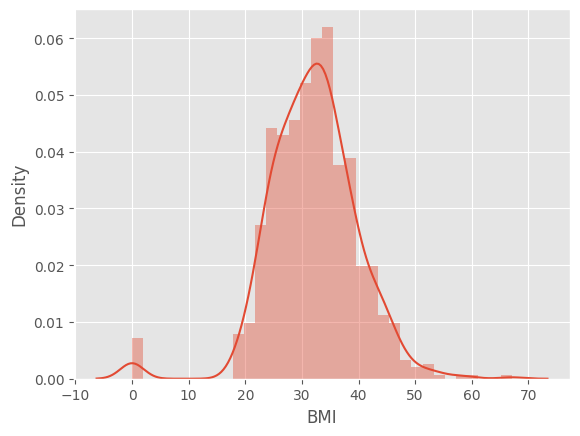

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(data['BMI'])

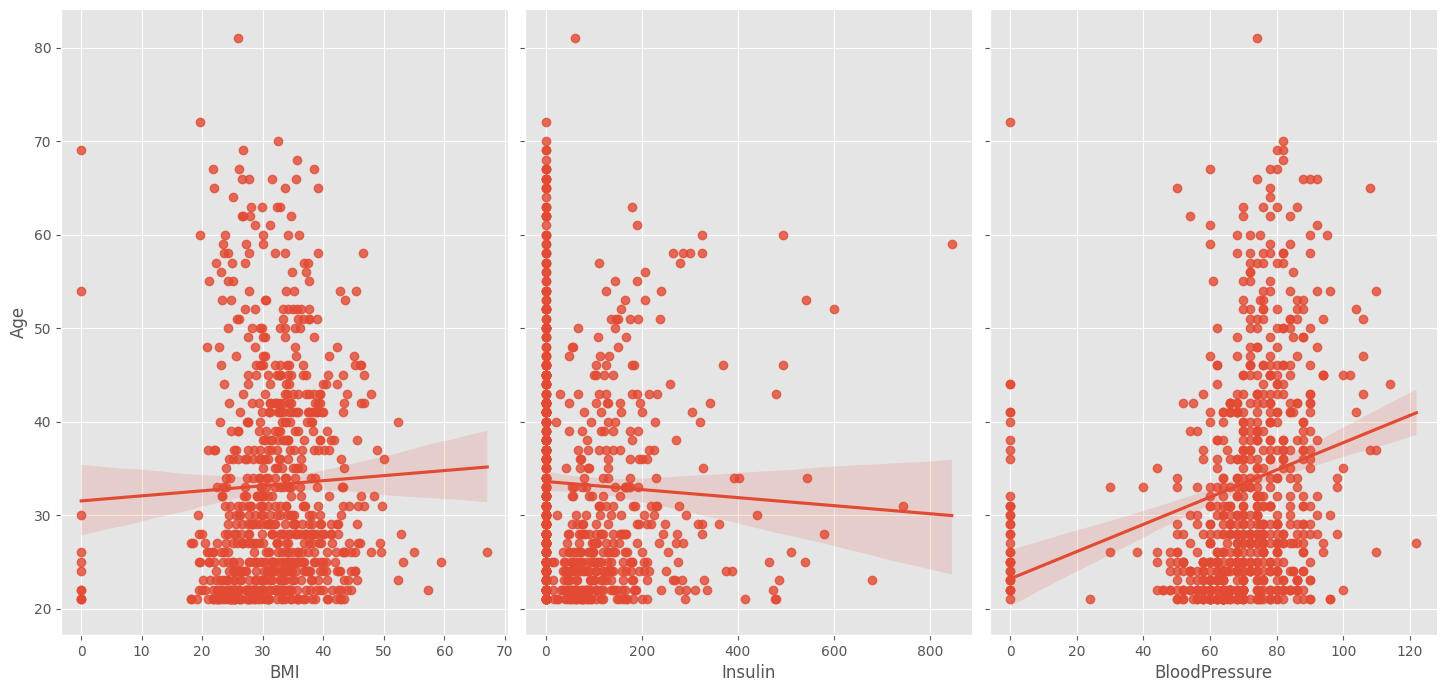

In [ ]:
sns.pairplot(data, x_vars=['BMI', 'Insulin', 'BloodPressure'], y_vars='Age', height=7, aspect=0.7, kind='reg')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y, random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)


(768, 8) (614, 8) (154, 8)


In [ ]:
from sklearn import svm
classifier=svm.SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score
X_train_prediction=classifier.predict(X_train)
training_data_accuracy_score=accuracy_score(y_train,X_train_prediction)
print(f"Accuracy Score of training data : {training_data_accuracy_score * 100} %")

Accuracy Score of training data : 78.33876221498372 %
